In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
import math
%matplotlib inline 

In [17]:
X = np.arange(0,10,1)
Y = np.arange(7,12,0.5)
X,Y

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5, 11. , 11.5]))

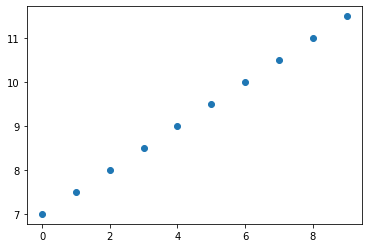

In [18]:
plt.scatter(X, Y)

In [23]:
linear_regressor = linear_model.LinearRegression()  # create object for the class
linear_regressor.fit(X.reshape(-1, 1), Y)

LinearRegression()

In [29]:
X_test = np.arange(0,10,2)
Y_pred = linear_regressor.predict(X_test.reshape(-1, 1))  # make predi

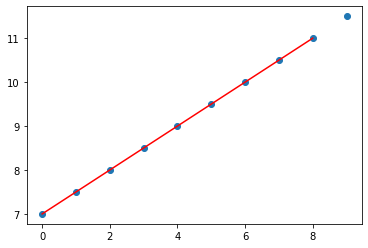

In [31]:
plt.scatter(X, Y)
plt.plot(X_test, Y_pred, color='red')
plt.show()

In [32]:
Y_pred

array([ 7.,  8.,  9., 10., 11.])

In [37]:
def sigmoid(x):
    y = 1/(1+np.exp(-x))
    return y
    

In [38]:
for i in X: # we observe 0 to 1
    print(sigmoid(i))

0.5
0.7310585786300049
0.8807970779778823
0.9525741268224334
0.9820137900379085
0.9933071490757153
0.9975273768433653
0.9990889488055994
0.9996646498695336
0.9998766054240137


In [45]:
Y = [0,0,1,0,0,1,1,0,0,1]
Logistic_regressor = linear_model.LogisticRegression()  # create object for the class
Logistic_regressor.fit(X.reshape(-1, 1), Y)

LogisticRegression()

In [63]:
X_test = np.arange(0,20,3)
Y_pred_LR = Logistic_regressor.predict(X_test.reshape(-1, 1)) 
Y_pred_LR

array([0, 0, 0, 1, 1, 1, 1])

In [55]:
prob = Logistic_regressor.predict_proba(X_test.reshape(-1, 1))
prob

array([[0.79317969, 0.20682031],
       [0.67706361, 0.32293639],
       [0.53405227, 0.46594773],
       [0.38521539, 0.61478461],
       [0.25514473, 0.74485527],
       [0.15772566, 0.84227434],
       [0.09286553, 0.90713447]])

In [56]:
Y = [0,0,1,0,0,1,1,0,0,1]
Linear_regressor = linear_model.LinearRegression()  # create object for the class
Linear_regressor.fit(X.reshape(-1, 1), Y)

LinearRegression()

In [61]:
X_test = np.arange(0,20,3)
Y_pred_Lin = Linear_regressor.predict(X_test.reshape(-1, 1)) 
Y_pred_Lin

array([0.18181818, 0.32727273, 0.47272727, 0.61818182, 0.76363636,
       0.90909091, 1.05454545])

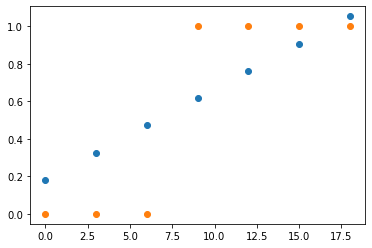

In [64]:
plt.scatter(X_test,Y_pred_Lin)
plt.scatter(X_test,Y_pred_LR)

In [66]:
ins_df = pd.read_excel('Tutor/insurance.xlsx')
ins_df.head()

,Age,Bought
0,20,0
1,21,0
2,22,0
3,23,1
4,24,0


In [68]:
from sklearn.model_selection import train_test_split
X = ins_df.Age.values.reshape(-1,1)
Y = ins_df.Bought.values
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.4)

In [70]:
model = linear_model.LogisticRegression()  # create object for the class
model.fit(X_train, y_train)

LogisticRegression()

In [71]:
pred=model.predict(X_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [72]:
from sklearn import metrics
conf_mat = metrics.confusion_matrix(y_test, pred)
print(conf_mat)

[[14  0]
 [ 9  0]]


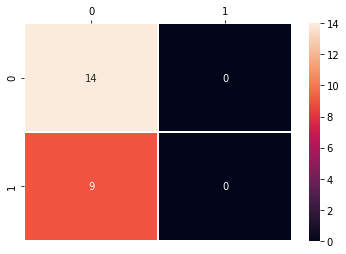

In [74]:
ax = sns.heatmap(conf_mat, linewidths=1,annot=True, fmt='g')
ax.xaxis.set_ticks_position('top')

In [75]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.61      1.00      0.76        14
           1       0.00      0.00      0.00         9

    accuracy                           0.61        23
   macro avg       0.30      0.50      0.38        23
weighted avg       0.37      0.61      0.46        23



C:\Users\shubdutta\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shubdutta\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\shubdutta\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


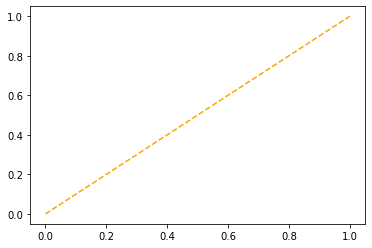

In [78]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresh1 = roc_curve(y_test, pred, pos_label=1)
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')

In [79]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [81]:
CV = KFold(n_splits=10, random_state=1, shuffle=True)

# evaluate model
scores = cross_val_score(model, X, Y, scoring='accuracy', cv=CV, n_jobs=2)
# report performance
print(scores)

[0.66666667 0.83333333 0.5        0.33333333 0.66666667 0.33333333
 0.4        0.2        0.6        0.2       ]


>1 mean=0.4733 se=0.068
>2 mean=0.4967 se=0.037
>3 mean=0.5100 se=0.029
>4 mean=0.5075 se=0.025


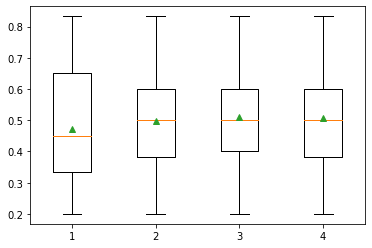

In [87]:
from sklearn.model_selection import RepeatedKFold
from scipy.stats import sem
kf = KFold(n_splits=25, random_state=5, shuffle=True)
model = linear_model.LogisticRegression()
repeats = range(1,5)
def evaluate_model(x, y, r):

    kf = RepeatedKFold(n_splits=10, n_repeats=r, random_state=1)

    
    scores = cross_val_score(model, x, y, scoring='accuracy', cv=kf, n_jobs=-1)
    return scores


results = list()
for r in repeats:
    scores = evaluate_model(X, Y, r)
    print('>%d mean=%.4f se=%.3f' % (r, np.mean(scores), sem(scores)))

    results.append(scores)

plt.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [89]:
from sklearn.decomposition import PCA

In [92]:
df = pd.read_csv("Tutor/hr.csv")
salary = {"low":  0, "medium": 1, "high":2}
df_cleaned = df.replace(salary)

In [93]:
department={}
cnt = 0
for dpt in df.Department.unique():
    department[dpt] = cnt
    cnt += 1

In [95]:
df_cleaned = df_cleaned.replace(department)
df_cleaned.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,quit,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0


In [97]:
X = df_cleaned.drop(columns=['quit'])
Y = df_cleaned.iloc[:, 6].values

In [98]:
pca = PCA(n_components=4)
pca.fit(X)

PCA(n_components=4)

In [99]:
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2', 'pc3', 'pc4'])

principalDf

,pc1,pc2,pc3,pc4
0,-44.067813,-3.355501,-0.698260,1.182007
1,60.968245,-3.327937,2.349428,0.071813
2,70.980855,-3.319657,0.921348,-2.325272
3,21.966923,-3.339280,1.615401,-0.568607
4,-42.067945,-3.355317,-0.711035,1.199894
...,...,...,...,...
14994,-50.067944,0.643774,-0.661259,1.140905
14995,-41.068593,0.644586,-0.719756,1.223193
14996,-58.067502,0.642881,-0.609889,1.069974
14997,78.969648,0.669729,0.572867,-1.299647


In [100]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

In [102]:
model = linear_model.LogisticRegression()  # create object for the class
model.fit(X_train, y_train)

C:\Users\shubdutta\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [103]:
pred=model.predict(X_test)
pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [104]:
model.score(X_test,y_test)

0.8031111111111111

>1 mean=0.7931 se=0.004
>2 mean=0.7912 se=0.002
>3 mean=0.7908 se=0.002
>4 mean=0.7894 se=0.002


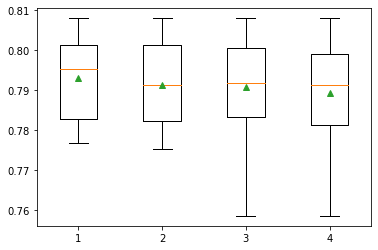

In [105]:
results = list()
for r in repeats:
    scores = evaluate_model(X, Y, r)
    print('>%d mean=%.4f se=%.3f' % (r, np.mean(scores), sem(scores)))

    results.append(scores)

plt.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
plt.show()

In [107]:
from sklearn import datasets

digits = datasets.load_digits()
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [108]:
X = digits.data
y = digits.target
print(X.shape)
print(y.shape)

(1797, 64)
(1797,)


<Figure size 432x288 with 0 Axes>

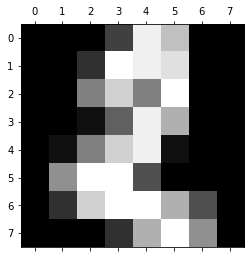

2


In [109]:
plt.gray()
plt.matshow(digits.images[2])
plt.show()
print(y[2])

In [110]:
for i in digits.target:
    print(i)

0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
9
5
5
6
5
0
9
8
9
8
4
1
7
7
3
5
1
0
0
2
2
7
8
2
0
1
2
6
3
3
7
3
3
4
6
6
6
4
9
1
5
0
9
5
2
8
2
0
0
1
7
6
3
2
1
7
4
6
3
1
3
9
1
7
6
8
4
3
1
4
0
5
3
6
9
6
1
7
5
4
4
7
2
8
2
2
5
7
9
5
4
8
8
4
9
0
8
9
8
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
9
5
5
6
5
0
9
8
9
8
4
1
7
7
3
5
1
0
0
2
2
7
8
2
0
1
2
6
3
3
7
3
3
4
6
6
6
4
9
1
5
0
9
5
2
8
2
0
0
1
7
6
3
2
1
7
3
1
3
9
1
7
6
8
4
3
1
4
0
5
3
6
9
6
1
7
5
4
4
7
2
8
2
2
5
5
4
8
8
4
9
0
8
9
8
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
9
5
5
6
5
0
9
8
9
8
4
1
7
7
3
5
1
0
0
2
2
7
8
2
0
1
2
6
3
3
7
3
3
4
6
6
6
4
9
1
5
0
9
5
2
8
2
0
0
1
7
6
3
2
1
7
4
6
3
1
3
9
1
7
6
8
4
3
1
4
0
5
3
6
9
6
1
7
5
4
4
7
2
8
2
2
5
7
9
5
4
8
8
4
9
0
8
9
3
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
1
2
3
4
5
6
7
8
9
0
9
5
5
6
5
0
9
8
9
8
4
1
7
7
3
5
1
0
0
2
2
7
8
2
0
1
2
6
3
3
7
3
3
4
6
6
6
4
9
1
5
0
9
5
2
8
2
0
0
1
7
6
3
2
1
7
4
6
3
1
3
9
1
7
6
8
4
3
1
4
0
5
3
6
9
6
1
7
5
4
4
7
2


In [111]:
X_train, x_test, Y_train, y_test = train_test_split(X, y, test_size=0.2)

In [116]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.transform(x_test)

In [117]:
model = linear_model.LogisticRegression()
model.fit(X_train, Y_train)

C:\Users\shubdutta\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [119]:
y_pred = model.predict(x_test)
model.score(x_test, y_test)

0.9277777777777778

In [122]:
Conf_mat = metrics.confusion_matrix(y_pred, y_test)
print(metrics.classification_report(y_test, y_pred)), Conf_mat

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        31
           1       0.84      0.97      0.90        33
           2       0.91      1.00      0.95        39
           3       0.92      0.94      0.93        35
           4       0.95      1.00      0.98        40
           5       0.94      0.97      0.96        33
           6       0.97      1.00      0.99        37
           7       0.95      1.00      0.98        40
           8       1.00      0.51      0.68        41
           9       0.83      0.97      0.90        31

    accuracy                           0.93       360
   macro avg       0.93      0.93      0.92       360
weighted avg       0.93      0.93      0.92       360



(None,
 array([[30,  0,  0,  0,  0,  0,  0,  0,  0,  0],
        [ 0, 32,  0,  0,  0,  0,  0,  0,  6,  0],
        [ 0,  0, 39,  1,  0,  1,  0,  0,  2,  0],
        [ 0,  1,  0, 33,  0,  0,  0,  0,  2,  0],
        [ 0,  0,  0,  0, 40,  0,  0,  0,  2,  0],
        [ 0,  0,  0,  1,  0, 32,  0,  0,  0,  1],
        [ 1,  0,  0,  0,  0,  0, 37,  0,  0,  0],
        [ 0,  0,  0,  0,  0,  0,  0, 40,  2,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0, 21,  0],
        [ 0,  0,  0,  0,  0,  0,  0,  0,  6, 30]], dtype=int64))

In [126]:
x_labels = y_labels = model.classes_

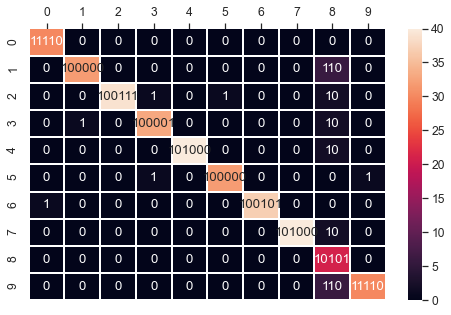

In [127]:
plt.figure(figsize=(8,5))
sns.set(font_scale=1.1)
ax = sns.heatmap(Conf_mat, linewidths=1,annot=True, fmt='b', xticklabels=x_labels, yticklabels=y_labels)
ax.xaxis.set_ticks_position('top')